# Corpus creation: collecting AI regulatory frameworks
---
By Miriam C. Weigand, June 2024

## Contents 
---

This notebook is about the corpus selection process on AI regulatory frameworks. The dataset used for corpus creation is provided by the [OECD.AI](https://oecd.ai/en/dashboards/overview).

1. First, I explore the dataset to narrow down the possible relevant documents. 

2. After this, I narrow down the relevant initiatives by using the OECD.AI principles and remove unnecessary columns to reduce clutter. Then the dataset is saved as a CSV-file `cleaned_policies.csv` and the remaining initiatives are check for relevance and availability manually. This process results in the final selection and the corpus documents are all downloaded as PDF-files in the `Policy_corpus` folder. 

3. The updated `corpus_selection.csv` shows, which initiatives are in the corpus and why some initiatives were not available or suitable. 

4. Lastly, the PDFs in the `Policy_corpus` are converted to txt files for the actual processing task of topic modelling. More on this can be found in the complementary Jupyter Notebooks `BERTopic_v1.ipynb` and `LEGAL_BERT_v2.ipynb` in the [Master Thesis Git Repo](https://github.com/v1alina/thesis).

## 1. Exploratory Data Analysis(EDA): Importing and exploring the OECD.AI dataset
---

Exploratory data analysis (EDA) is an essential first step for familiarizing yourself with any dataset.
It is common to check how our entries look like, what columns we have available and checking if there are any noteable null-values (missing entries) among other things.

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('corpus/oecd-ai-all-ai-policies.csv')

In [3]:
# Displaying the first 5 entries
df.head(5)

,Policy initiative ID,Platform URL,English name,Original name(s),Acronym,Country,Start date,End date,Description,Theme area(s),...,Objective,Deployment year,Cancellation reason,Entities involvement,Allocated funding,Methodology in place to assess the risk and evaluate the impact of AI in public services,Measures taken to communicate the use of the AI system to citizens (transparency),Measures taken to enable citizens to understand and challenge the outcome of the AI system (explainability and accountability),"Audit, certification, monitoring, evaluation or regulation process",Entered into force on
0,2021/data/policyInitiatives/1335,https://oecd.ai/en/dashboards/policy-initiativ...,SPACERESOURCES.LU,NaN,NaN,Luxembourg,2016.0,NaN,"Within the SpaceResources.lu initiative, the c...",National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/data/policyInitiatives/1337,https://oecd.ai/en/dashboards/policy-initiativ...,DIGITAL LUXEMBOURG,Digital Lëtzebuerg,NaN,Luxembourg,2014.0,NaN,Consolidating Luxembourgs position in the ICT ...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/data/policyInitiatives/1337,https://oecd.ai/en/dashboards/policy-initiativ...,DIGITAL LUXEMBOURG,Digital Lëtzebuerg,NaN,Luxembourg,2014.0,NaN,Consolidating Luxembourgs position in the ICT ...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/data/policyInitiatives/1355,https://oecd.ai/en/dashboards/policy-initiativ...,DIGITAL TECH FUND,NaN,NaN,Luxembourg,2016.0,NaN,A seed fund was set up in 2016 jointly by the ...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/data/policyInitiatives/13968,https://oecd.ai/en/dashboards/policy-initiativ...,GAMEINN,NaN,NaN,Poland,2016.0,NaN,Funding opportunities for the producers of vid...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)

(1884, 52)


The shape tells us that we have a total of 1884 entries (rows) and 52 columns in our dataframe. Since we have a lot of columns in the dataset, it might be interesting to check some of them and see if they are really useful for us.

In [5]:
print(df.columns)

Index(['Policy initiative ID', 'Platform URL', 'English name',
       'Original name(s)', 'Acronym', 'Country', 'Start date', 'End date',
       'Description', 'Theme area(s)', 'Theme(s)', 'Background',
       'Objective(s)', 'Target group type(s)', 'Target group(s)',
       'Responsible organisation(s)', 'Yearly budget range',
       'Budget amount\n(in local currency)',
       'Has funding from private sector ?', 'Public access URL',
       'Is a structural reform ?', 'Is evaluated ?', 'Evaluation URL',
       'AI Principle(s)', 'AI Policy Area(s)', 'Other AI Policy Area(s)',
       'Shift(s) related to Covid', 'Evaluation performed by',
       'Evaluation type', 'Evaluation provides input to',
       'Policy instrument ID', 'Policy instrument type category',
       'Policy instrument type', 'Policy instrument name',
       'Policy instrument description(s)',
       'Strategy priority targets and deadlines',
       'Coordinating institution name', 'Consultation process objective',
  

As we can see there are a lot of different columns. However, as is visible in the preview of the dataset above, a lot of those also have Null values. Additionally, some of these are not quite as useful considering that we mainly want to do a textual analysis.

## 2. Filtering for specific ethical principles
---

One useful aspect of the dataset is that the OECD already classifies [principles for trustworthy AI](https://oecd.ai/en/ai-principles) that are appearing in the policy initiatives using the `AI Principle(s)` column. 

As the research centers around the specific meaning and understanding of accountability, I am filtering for the entries (documents), where the OECD identified relevant principles to be existing. Additionally, I am also included the closely related and also discussed ideas of transparency and explainability as they are frequently interlinked and discussed together. 

In [6]:
# Replacing all the missing values in the AI Principles column with 'None' so that we can look for specific strings
values = {'AI Principle(s)': 'None'}
df =df.fillna(value=values)

In [7]:
# Collecting all entries where accountability is flagged as a principle
acc_df = df[df['AI Principle(s)'].str.contains("Accountability")]
acc_df.shape

(430, 52)

In [8]:
# Collecting all entries where transparency is flagged as a principle
trans_df = df[df['AI Principle(s)'].str.contains("Transparency and explainability")]
trans_df.shape

(511, 52)

In [9]:
# Combining the accountability and transparency dataframes
joint_df = pd.concat([trans_df, acc_df])
joint_df.shape

(941, 52)

In [10]:
# Dropping any duplicate columns as some entries may contain both principles and could appear double
joint_df = joint_df.drop_duplicates()
joint_df.shape 

(578, 52)

As we can see with the reduced amount of entries of 578, we now should have all the documents that contain either transparency, accountability or both principles. 

In [11]:
joint_df.head(5)

,Policy initiative ID,Platform URL,English name,Original name(s),Acronym,Country,Start date,End date,Description,Theme area(s),...,Objective,Deployment year,Cancellation reason,Entities involvement,Allocated funding,Methodology in place to assess the risk and evaluate the impact of AI in public services,Measures taken to communicate the use of the AI system to citizens (transparency),Measures taken to enable citizens to understand and challenge the outcome of the AI system (explainability and accountability),"Audit, certification, monitoring, evaluation or regulation process",Entered into force on
29,2021/data/policyInitiatives/14907,https://oecd.ai/en/dashboards/policy-initiativ...,AUSTRIAN COUNCIL FOR ROBOTICS AND AI,Österreichischer Rat für Robotik und Künstlich...,ACRAI,Austria,2017.0,NaN,ACRAI was established by the Minister of the F...,National AI Policies|Value-based Principles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2021/data/policyInitiatives/14907,https://oecd.ai/en/dashboards/policy-initiativ...,AUSTRIAN COUNCIL FOR ROBOTICS AND AI,Österreichischer Rat für Robotik und Künstlich...,ACRAI,Austria,2017.0,NaN,ACRAI was established by the Minister of the F...,National AI Policies|Value-based Principles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2021/data/policyInitiatives/15413,https://oecd.ai/en/dashboards/policy-initiativ...,ADVANCED INTEGRATED INTELLIGENCE PLATFORM PROJECT,人工知能／ビッグデータ／IoT／サイバーセキュリティ統合プロジェクト,AIP,Japan,2016.0,NaN,To gather top researchers and promote R&D for ...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2021/data/policyInitiatives/15413,https://oecd.ai/en/dashboards/policy-initiativ...,ADVANCED INTEGRATED INTELLIGENCE PLATFORM PROJECT,人工知能／ビッグデータ／IoT／サイバーセキュリティ統合プロジェクト,AIP,Japan,2016.0,NaN,To gather top researchers and promote R&D for ...,National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2021/data/policyInitiatives/23955,https://oecd.ai/en/dashboards/policy-initiativ...,COORDINATED PLAN ON ARTIFICIAL INTELLIGENCE,NaN,NaN,European Union,2018.0,NaN,"The coordinated plan builds on a ""Declaration ...",National AI Policies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After inspected the DataFrame again, I realised that it still contained a lot of duplicates. This is a quirk of the orginal dataset `oecd-ai-all-ai-policies.csv` and not caused by the merging of the datasets based on the different ethical principles.

The `Policy initiative ID` is used as a unique identifier for all the policy initiatives. This is why I am using only this column to drop any of the remaining duplicates in the dataset. 

In [12]:
cleaned_joint = joint_df.drop_duplicates(subset='Policy initiative ID')

Now, let's check how many entries we have remaining:

In [13]:
cleaned_joint.shape

(293, 52)

Next, the dataset contains a lot of columns, however not all of these are useful or interesting for our usecase.
For this reason, I collected columns that were not relevant and removed them from the dataset in order to avoid any clutter.

In [16]:
to_be_dropped = ['Has funding from private sector ?', 'Is a structural reform ?',
                 'Is evaluated ?', 'Evaluation URL','AI Principle(s)', 'AI Policy Area(s)',
                 'Other AI Policy Area(s)','Shift(s) related to Covid', 'Evaluation performed by',
                 'Evaluation type', 'Evaluation provides input to','Policy instrument ID',
                 'Policy instrument type category','Policy instrument type', 'Policy instrument name',
                 'Policy instrument description(s)','Strategy priority targets and deadlines',
                 'Coordinating institution name', 'Consultation process objective',
                 'Consultation process begin date', 'Consultation process end date',
                 'Start date', 'End date','Description', 'Theme area(s)', 'Theme(s)',
                 'Background', 'Objective(s)', 'Target group type(s)', 'Target group(s)',
                 'Yearly budget range','Budget amount\n(in local currency)',
                 'Policy instrument mini-field(s)', 'Objective', 'Deployment year',
                 'Methodology in place to assess the risk and evaluate the impact of AI in public services',
                 'Measures taken to communicate the use of the AI system to citizens (transparency)',
                 'Measures taken to enable citizens to understand and challenge the outcome of the AI system (explainability and accountability)',
                 'Audit, certification, monitoring, evaluation or regulation process','Entered into force on',
                 'Cancellation reason', 'Entities involvement', 'Allocated funding']
cleaned_joint = cleaned_joint.drop(labels = to_be_dropped, axis = 1)

We can do a final check of the DataFrame's shape to check if everything is in order:

In [17]:
cleaned_joint.shape

(293, 9)

Now, we have narrowed down the dataset to 293 possibly relevant policy initatives and only 9 columns of metadata on them. Next, I am saving the DataFrame to a CSV file. After this, I will use the newly created CSV file `cleaned_policies.csv` in order to check each of the entries and download them.

In [40]:
cleaned_joint.to_csv('corpus/cleaned_policies.csv') # please note that this is saved in a folder called corpus

## 3. Evaluating the corpus
---

Using Google Sheets, I imported the `cleaned_policies.csv` file and check the URLs of each entry.
In doing so, I added two new columns `Available in English` and `Invalid/irrelevant source` to classify which entries were available and added to the final corpus (more information what classifies as "Invalid/irrelevant source" is in the thesis).

After manually checking all 293 entries, the final corpus consists of a total of 86 documents from this dataset. All the PDFs were downloaded and named after their respective `Policy initiative ID` the only difference being the forward slash `/` being replaced with a underscore `_`. This is because the `/` may cause issues with reading the files as it usually denotes going into a folder when opening a file.

In [36]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Reading the final corpus selection CSV
selected_df = pd.read_csv('corpus/corpus_selection.csv')

In [22]:
selected_df.head()

,Unnamed: 0,Policy initiative ID,Platform URL,English name,Original name(s),Acronym,Country,Responsible organisation(s),Link,Public access URL,Available in English,Invalid/irrelevant source
0,29.0,2021/data/policyInitiatives/14907,https://oecd.ai/en/dashboards/policy-initiativ...,AUSTRIAN COUNCIL FOR ROBOTICS AND AI,Österreichischer Rat für Robotik und Künstlich...,ACRAI,Austria,"Federal Ministry for Transport, Innovation and...",NaN,https://www.acrai.at/,NaN,True
1,45.0,2021/data/policyInitiatives/15413,https://oecd.ai/en/dashboards/policy-initiativ...,ADVANCED INTEGRATED INTELLIGENCE PLATFORM PROJECT,人工知能／ビッグデータ／IoT／サイバーセキュリティ統合プロジェクト,AIP,Japan,RIKEN (RIKEN;理化学研究所)|Japan Science and Technol...,NaN,https://www.riken.jp/en/\nhttps://www.jst.go.j...,No,NaN
2,88.0,2021/data/policyInitiatives/23955,https://oecd.ai/en/dashboards/policy-initiativ...,COORDINATED PLAN ON ARTIFICIAL INTELLIGENCE,NaN,NaN,European Union,European Commission (EC;),NaN,https://ec.europa.eu/digital-single-market/en/...,Yes,NaN
3,144.0,2021/data/policyInitiatives/24197,https://oecd.ai/en/dashboards/policy-initiativ...,AI SOURCE LIST,NaN,NaN,Canada,Treasury Board Secretariat (TBS;),NaN,https://buyandsell.gc.ca/procurement-data/tend...,Yes,NaN
4,154.0,2021/data/policyInitiatives/24211,https://oecd.ai/en/dashboards/policy-initiativ...,FINNISH CENTRE FOR AI,Suomen tekoälykeskus,FCAI,Finland,Aalto University (;Aalto-yliopisto)|University...,NaN,https://fcai.fi/,NaN,True


The code below let's us check how many entries had a "Yes" in the `Available in English` column, which comes out to a total of 86 documents.

In [29]:
filter_downloaded = selected_df[selected_df['Available in English']=='Yes'].count()
filter_downloaded['Available in English']

86

Further, we can do some visualizations of where the policy initiatives come from. First, I am checking all the policies initiatives that were selected for a manual check, which shows quite some diversity in origins:

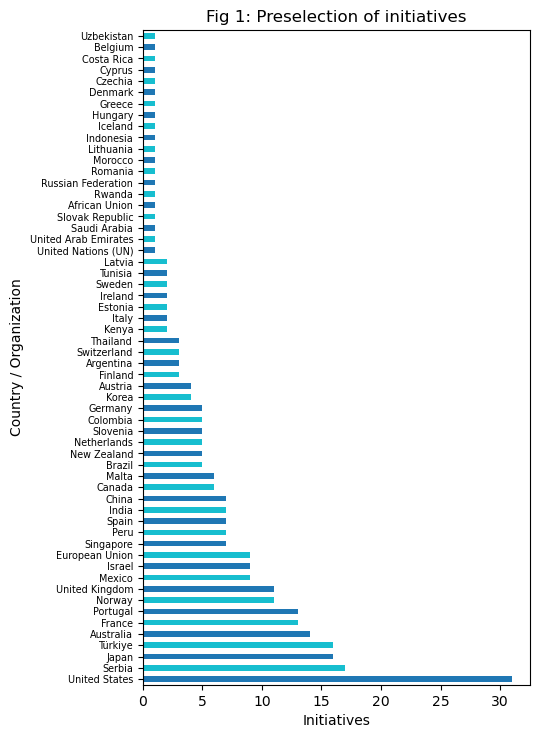

In [8]:
bar_colors = ['tab:blue', 'tab:cyan']
selected_df.value_counts('Country').plot(kind='barh', title="Fig 1: Preselection of initiatives", figsize =(5,8.5), color = bar_colors)
plt.ylabel('Country / Organization')
plt.xlabel('Initiatives')
plt.yticks(fontsize = 'x-small')
plt.savefig('Total_initiatives_per_country.png', bbox_inches = 'tight')

After this, let's contrast this with the origins of the initiatives, which are actually part of the corpus:

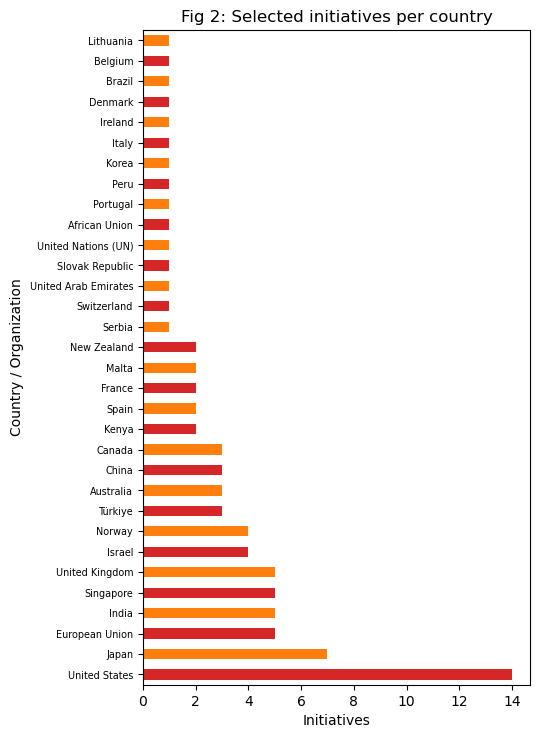

In [9]:
bar_colors = ['tab:red', 'tab:orange']
filter_downloaded.value_counts('Country').plot(kind='barh', title="Fig 2: Selected initiatives per country", figsize =(5,8.5), color = bar_colors)
plt.ylabel('Country / Organization')
plt.xlabel('Initiatives')
plt.yticks(fontsize = 'x-small')
plt.savefig('Selected_initiatives_per_country.png', bbox_inches = 'tight')

Lastly, we can check, how the documents were filtered out. We can see below that 158 entries we discarded due to an invalid/irrelevant source. I go into the definition of what falls into this category further in the thesis. 

In [34]:
filter_english = selected_df.value_counts('Available in English')
filter_relevant = selected_df.value_counts('Invalid/irrelevant source')

print(filter_english)
print('\n')
print(filter_relevant)

Available in English
Yes    86
No     55
Name: count, dtype: int64


Invalid/irrelevant source
True    158
Name: count, dtype: int64


## 4. Converting PDFs into text files for further processing
---

Lastly, in order to make use of the dataset, the actual text of the PDFs is needed.
Below I am using the Fitz library in order to extract the text and save it in a new folder called `corpus_txt`. Now the corpus is ready for preprocessing (see next Notebook `BERTopic_v1.ipynb`). 

In [ ]:
from glob import glob
import sys
import pathlib
import fitz
import os
from os import makedirs
from os.path import join

folder = 'corpus_txt' # Create new folder name
makedirs(folder, exist_ok=True) # Create a directory/folder


for pdf in glob("Policy_corpus" + '/*.pdf'): # Looping through the folder in which the PDFs are saved to convert to TXT
    filename = pdf.split('/')[1].split('.')[0]  # Extracting the first part of the name 
    filepath = join(folder, '{}.txt'.format(filename)) # Creating a new filepath
    
    doc = fitz.open(pdf) # Open the PDF
    out = open(filepath, "wb") # Create a text output
    for page in doc: # Iterate the document pages
        text = page.get_text().encode("utf8") # Get plain text (in UTF-8)
        out.write(text) # Write text of page
        out.write(bytes((12,))) # Write page delimiter (form feed 0x0C)
    out.close()